# Bookstore Depository Dataset

We have a dataset from a bookstore about their books, their ratings, IDs and other feautes.

We have tried to make 2 classification models.

1. Making a new column - 'discretized_rating' which has discrete rating values in the interval of 0.5 having 10 classes from 0 to 5.

2. Classifying a given book as either it is heavy or not based by predicting weight from dimentions of the book.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bookRepo/dataset.csv')


In [ ]:
# This line of code is used to obtain the dimensions (number of rows and columns) of a DataFrame named 'df'.
# It helps you understand the size of the DataFrame.
df.shape

(669253, 28)

In [ ]:
# The 'info()' method is used to retrieve essential information about a DataFrame named 'df'.
# It provides details such as the data types, non-null values, and memory usage of each column.
df.info()
# Running this command will display a summary of the DataFrame's structure and content.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669253 entries, 0 to 1109376
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   authors             669253 non-null  object 
 1   bestsellers-rank    530566 non-null  float64
 2   categories          669253 non-null  object 
 3   description         644881 non-null  object 
 4   dimension-x         656623 non-null  float64
 5   dimension-y         643653 non-null  float64
 6   dimension-z         656623 non-null  float64
 7   edition             136481 non-null  object 
 8   edition-statement   263692 non-null  object 
 9   for-ages            57668 non-null   object 
 10  format              668300 non-null  float64
 11  id                  669253 non-null  int64  
 12  illustrations-note  228354 non-null  object 
 13  image-checksum      669235 non-null  object 
 14  image-path          669235 non-null  object 
 15  image-url           669235 non-nu

In [ ]:
# This line of code is used to configure the display options for a Pandas DataFrame using 'pd' as the Pandas library.
# It sets the maximum number of columns to be displayed in DataFrame outputs to 30.
pd.set_option('display.max_columns', 30)
# After executing this, DataFrames with more than 30 columns will still be accessible, but only the first and last columns will be displayed by default to prevent clutter.


In [ ]:
df

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,id,illustrations-note,image-checksum,image-path,image-url,imprint,index-date,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.00,198.00,20.00,NaN,NaN,NaN,1.0,9781840189070,NaN,97c8e71f2ec114b34f243074d2091077,full/c/5/2/c529152ea1246c0cb17d6574d302eae6d2e...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Mainstream Publishing,NaN,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00
1,"[2, 3]",115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.00,203.20,25.40,NaN,NaN,NaN,1.0,9781844547371,NaN,1dc4e79575474ac775cdfe9840bdfb94,full/5/9/8/598ae8f736c99bc423352887d406d2b2f94...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,184454737X,9781844547371,en,2009-03-13 00:00:00,NaN,3.60,335.0,Underbelly : The Gangland War,/Underbelly-Andrew-Rule/9781844547371,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.00,224.00,28.00,New edition,NaN,NaN,1.0,9788416327867,NaN,3be3fd4fb2fceeb1eb58c3e73242ebb9,full/1/a/2/1a24ac04d4e0a01c8bb531481244b543167...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.00,234.00,24.00,NaN,Export - Airside ed,NaN,1.0,9780571308996,NaN,bc593914f06e1021be9977114ea2a28f,full/1/a/f/1af9cad94dfe897b4423993c78b137bee40...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,571308996,9780571308996,en,2015-10-01 00:00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,/QI-Third-Book-General-Ignorance-John-Lloyd/97...,436.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.00,240.00,29.00,NaN,NaN,NaN,2.0,9780008352516,NaN,39c0422c00be90fb9258dd6df9068b1e,full/e/e/a/eea0ff6b6f1882d1862c711a2008e3c35d3...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,HarperCollins Publishers Ltd,NaN,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109378,[120629],NaN,[3055],NaN,140.00,216.00,6.00,NaN,NaN,NaN,1.0,9780879802684,NaN,99a309fc5b36f7f15e64db8462f47c32,full/f/c/4/fc427cd3bcbdf95e0a3cc8986b44a188950...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,879802685,9780879802684,en,1980-12-01 00:00:00,NaN,NaN,NaN,Making Money at the Races,/Making-Money-at-Races-David-Barr/9780879802684,227.00
1109379,[336369],NaN,"[3045, 3054, 3068, 3086]",This 2020 Diary/Planner has one week per 2 pag...,151.89,229.11,7.11,NaN,NaN,NaN,1.0,9781711791968,NaN,d9f083c9c171c71b1df27f6dc2d66ba1,full/4/d/4/4d4766e368dc599bf375c320460042c36b8...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,1711791962,9781711791968,en,2019-11-25 00:00:00,NaN,NaN,NaN,"2020 : Diary, Weekly Planner, Organiser, Year ...",/2020-Annie-Mac-Journals/9781711791968,185.97
1109380,"[29792, 654019]",NaN,[3096],This special re-print edition of James A. Crui...,216.00,279.00,8.00,NaN,NaN,NaN,1.0,9781792858017,"Illustrations, black and white",98d28c0af6a2b740ba009490a30d17ed,full/9/e/7/9e7db64b6b3eb2626731745beb513c2a3db...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,1792858019,9781792858017,en,2018-12-28 00:00:00,NaN,NaN,NaN,Canoeing and Camping,/Canoeing-Camping-James-Cruikshank/9781792858017,372.00
1109381,[654020],NaN,"[3054, 3056]",Good western riding doesn't just ha

In [ ]:
# This code is used to count the number of missing (null or NaN) values in each column of a DataFrame named 'df'.
# The 'isnull()' method returns a DataFrame of boolean values where 'True' indicates a missing value, and 'False' indicates a non-missing value.
# The 'sum()' method then counts the 'True' values in each column, giving the total count of missing values for each column.
df.isnull().sum()

authors                    0
bestsellers-rank      138687
categories                 0
description            24372
dimension-x            12630
dimension-y            25600
dimension-z            12630
edition               532772
edition-statement     405561
for-ages              611585
format                   953
id                         0
illustrations-note    440899
image-checksum            18
image-path                18
image-url                 18
imprint               469981
index-date            669253
isbn10                     0
isbn13                     0
lang                   16360
publication-date         340
publication-place     669253
rating-avg                 0
rating-count               0
title                      0
url                        0
weight                 29419
dtype: int64

dfrc

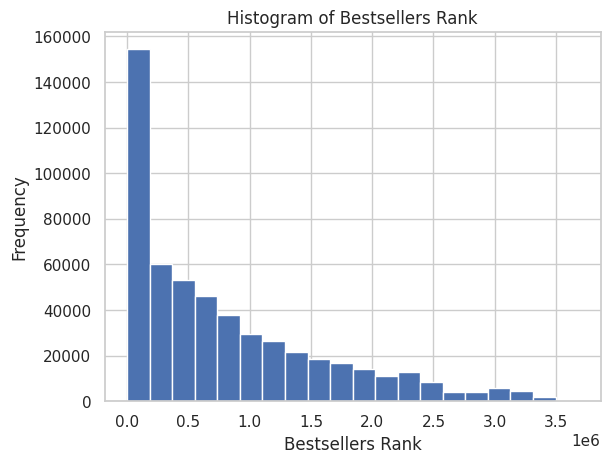

In [ ]:
# Data Visualization
# Creating a histogram for a numeric column, in this case, 'bestsellers-rank'.
# Use the 'plt.hist()' function to create a histogram.
# It takes the numeric column 'bestsellers-rank' as the data, and 'bins=20' specifies the number of bins or intervals.

plt.hist(df['bestsellers-rank'], bins=20)

# Adding labels and a title for clarity.
plt.xlabel('Bestsellers Rank')
plt.ylabel('Frequency')
plt.title('Histogram of Bestsellers Rank')

# Display the histogram.
plt.show()

In [ ]:
dfrc = df[['rating-count']]

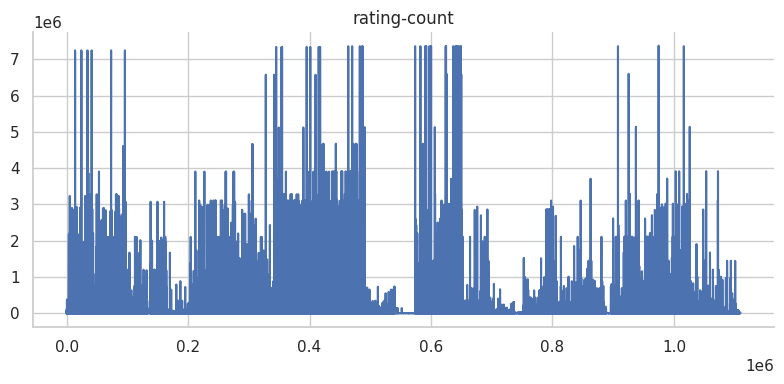

In [ ]:
# Importing the 'pyplot' module from the 'matplotlib' library to create a line plot.
from matplotlib import pyplot as plt

# Creating a line plot for the 'rating-count' column in the DataFrame 'dfrc'.
dfrc['rating-count'].plot(kind='line', figsize=(8, 4), title='rating-count')

# Removing the top and right spines (borders) of the plot to enhance visualization.
plt.gca().spines[['top', 'right']].set_visible(False)

# Ensuring a tight layout for a cleaner presentation.
plt.tight_layout()


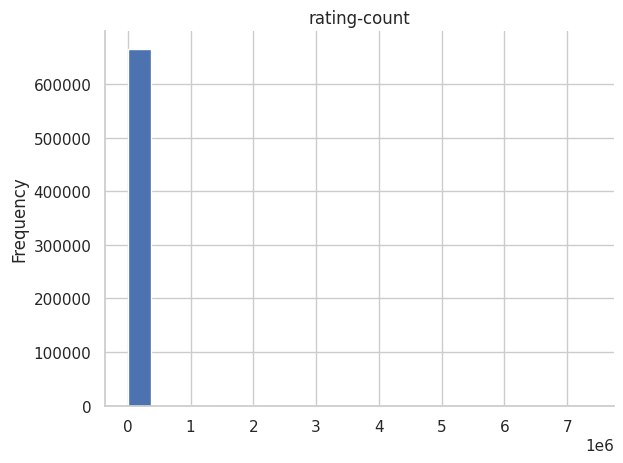

In [ ]:
# Importing the 'pyplot' module from the 'matplotlib' library to create a histogram.
from matplotlib import pyplot as plt

# Creating a histogram for the 'rating-count' column in the DataFrame 'dfrc' with 20 bins (intervals).
dfrc['rating-count'].plot(kind='hist', bins=20, title='rating-count')

# Removing the top and right spines (borders) of the plot for improved visualization.
plt.gca().spines[['top', 'right']].set_visible(False)

# Ensuring a tight layout for a cleaner presentation.
plt.tight_layout()

# This code segment generates a histogram for the 'rating-count' column, adjusts the plot appearance, and displays it.


In [ ]:
dfrc.value_counts()

rating-count
1.0             78025
2.0             34185
3.0             25288
4.0             19833
5.0             16408
                ...  
27558.0             1
27588.0             1
27589.0             1
27590.0             1
7377337.0           1
Length: 27912, dtype: int64

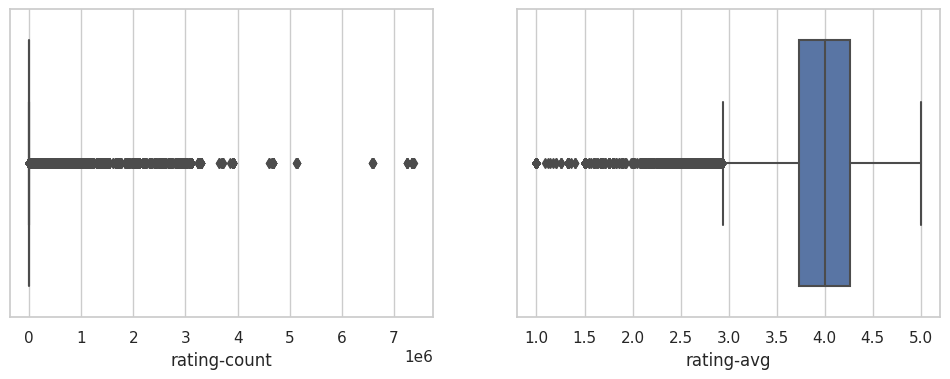

In [ ]:
# Creating a figure with two subplots (side by side) using 'plt.subplots'.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Setting the style of the Seaborn plots to "whitegrid."
sns.set_theme(style="whitegrid")

# Looping over two columns, 'rating-count' and 'rating-avg' for visualization.
for axid, col in enumerate(['rating-count', 'rating-avg']):
    # Creating box plots for the respective columns and assigning them to the subplots.
    sns.boxplot(x=df[col], ax=ax[axid])

In [ ]:
dfrc.describe()

,rating-count
count,6.692530e+05
mean,1.239215e+04
std,1.333263e+05
min,1.000000e+00
25%,5.000000e+00
50%,3.900000e+01
75%,5.200000e+02
max,7.377337e+06


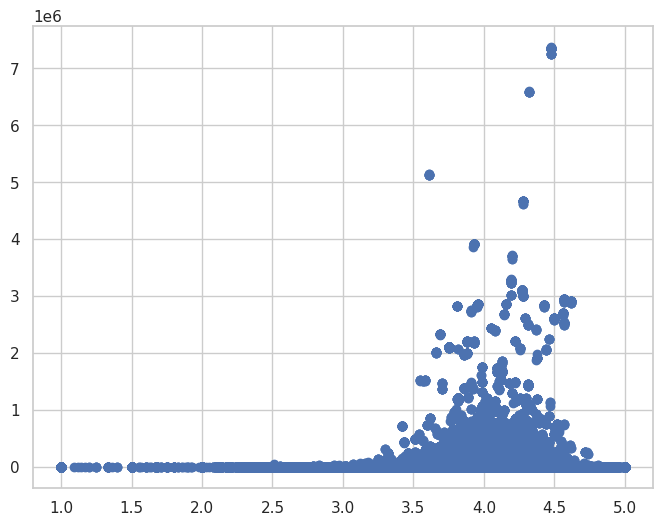

In [ ]:
# Creating a new figure with a specific size (8x6 inches) for the scatter plot.
plt.figure(figsize=(8, 6))

# Generating a scatter plot using the 'rating-avg' column as the x-axis and 'rating-count' as the y-axis.
plt.scatter(df['rating-avg'], df['rating-count'])

We can see that most of the ratings lie in the range of 3.5 to 4.5

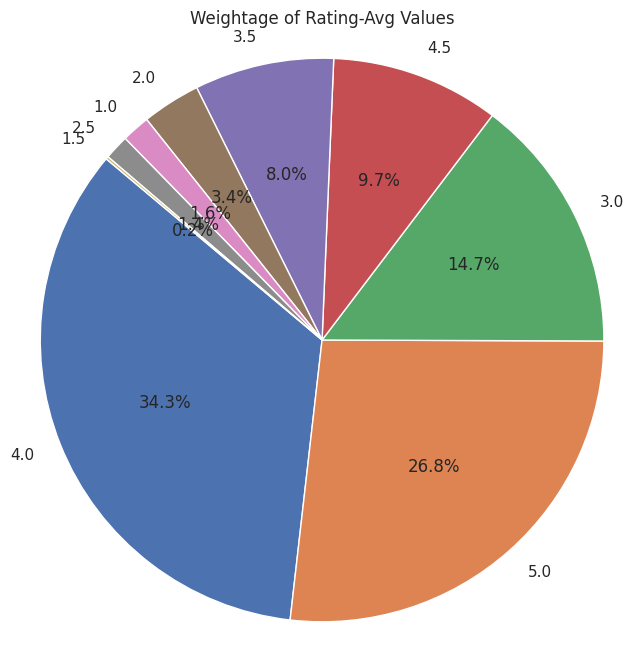

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'df'
# Remove rows with missing 'rating-avg' values
df.dropna(subset=['rating-avg'], inplace=True)

# Define the specific 'rating-avg' values of interest
rating_avg_values = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Filter the DataFrame to include only the specified 'rating-avg' values
filtered_df = df[df['rating-avg'].isin(rating_avg_values)]

# Count the number of books for each 'rating-avg' value
rating_avg_counts = filtered_df['rating-avg'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_avg_counts, labels=rating_avg_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Weightage of Rating-Avg Values')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is round
plt.show()

In [ ]:
len(df[df['rating-count'] < 5])

157331

<ipython-input-19-64fae83979ac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


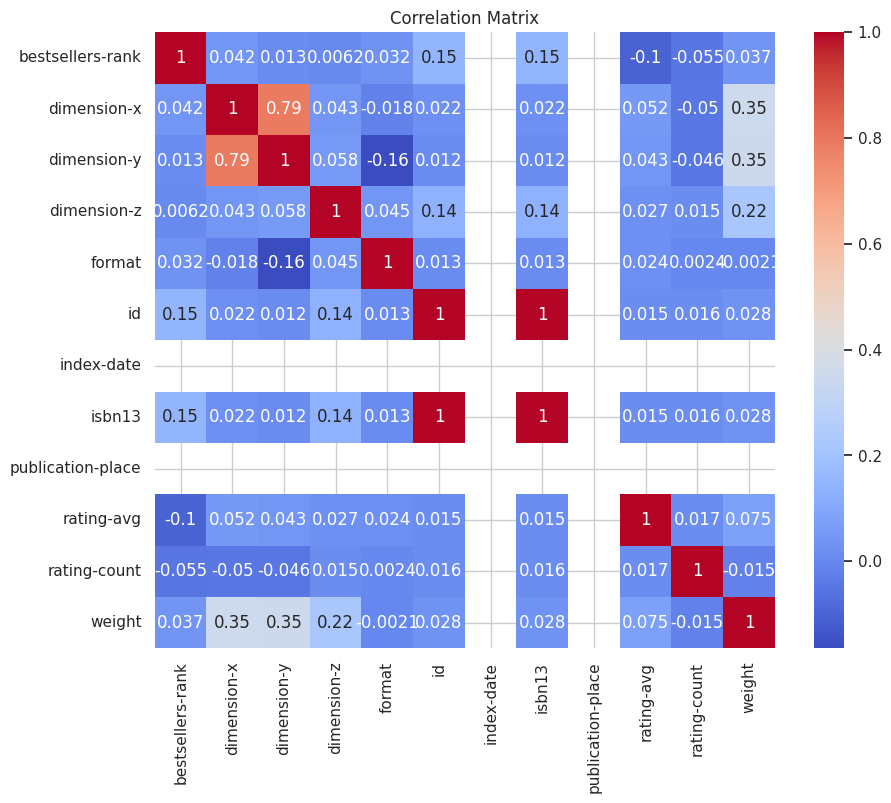

In [ ]:
# Correlation Analysis
# Calculate and visualize a correlation matrix
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))  # You can adjust the width (10) and height (8) as needed

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Creating a new DataFrame 'df_pred1' by selecting specific columns ('authors', 'bestsellers-rank', and 'rating-avg') from the original DataFrame 'df'.
df_pred1 = df[['authors', 'bestsellers-rank', 'rating-avg']]

# 'df_pred1' will now contain only the selected columns from 'df'.
df_pred1

,authors,bestsellers-rank,rating-avg
0,[1],49848.0,4.03
1,"[2, 3]",115215.0,3.60
2,[4],11732.0,3.88
3,"[5, 6, 7, 8]",114379.0,4.17
4,[9],98413.0,3.90
...,...,...,...
1109367,[654012],NaN,4.43
1109368,[654013],NaN,4.00
1109369,[483284],NaN,4.00
1109372,[654015],NaN,3.88


In [ ]:
df_pred1.isnull().sum()

authors                  0
bestsellers-rank    138687
rating-avg               0
dtype: int64

Now, dropping the instances which have NULL values

In [ ]:

df_pred1_cleaned = df_pred1.dropna()

In [ ]:
df_pred1_cleaned.isnull().sum()

authors             0
bestsellers-rank    0
rating-avg          0
dtype: int64

Now, we create a new feature names discretized rating in which we round off the rating averages to the closest discrete value as we have assigned to be 0, 0.5,1 ... 4.5, 5

In [ ]:
# Defining the minimum, maximum, and gap values for discretizing ratings.
min_rating = 0
max_rating = 5
gap = 0.5

# Creating a new column 'discretized_rating' in the DataFrame 'df_pred1_cleaned' by discretizing the 'rating-avg' column.
# This involves subtracting the minimum rating, dividing by the gap, rounding to the nearest multiple of the gap, and then multiplying by the gap.
df_pred1_cleaned['discretized_rating'] = ((df_pred1_cleaned['rating-avg'] - min_rating) / gap).round() * gap

# 'df_pred1_cleaned' will now have an additional column 'discretized_rating' that represents discretized ratings.



<ipython-input-110-51071258ae46>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred1_cleaned['discretized_rating'] = ((df_pred1_cleaned['rating-avg'] - min_rating) / gap).round() * gap


In [ ]:
df_pred1_cleaned

,authors,bestsellers-rank,rating-avg,discretized_rating
0,[1],49848.0,4.03,4.0
1,"[2, 3]",115215.0,3.60,3.5
2,[4],11732.0,3.88,4.0
3,"[5, 6, 7, 8]",114379.0,4.17,4.0
4,[9],98413.0,3.90,4.0
...,...,...,...,...
1109292,[328295],2203828.0,4.67,4.5
1109297,"[653986, 653987]",1823340.0,3.67,3.5
1109305,[28929],1802964.0,5.00,5.0
1109350,[654002],2780555.0,5.00,5.0


Now, we do not need rating-avg column as now we will be working on classification problem of discrete rating

In [ ]:

df_pred1_cleaned = df_pred1_cleaned.drop(columns=['rating-avg'])

In [ ]:
df_pred1_cleaned

,authors,bestsellers-rank,discretized_rating
0,[1],49848.0,4.0
1,"[2, 3]",115215.0,3.5
2,[4],11732.0,4.0
3,"[5, 6, 7, 8]",114379.0,4.0
4,[9],98413.0,4.0
...,...,...,...
1109292,[328295],2203828.0,4.5
1109297,"[653986, 653987]",1823340.0,3.5
1109305,[28929],1802964.0,5.0
1109350,[654002],2780555.0,5.0


In [ ]:
df_pred1_cleaned.dtypes

authors                object
bestsellers-rank      float64
discretized_rating    float64
dtype: object

In [ ]:
# Importing the 'sys' module.
import sys

# Specifying the column name for which you want to find the maximum size of an element.
column_name = 'authors'

# Using 'apply' and 'sys.getsizeof' to find the maximum size of an element in the specified column.
max_size = df_pred1_cleaned[column_name].apply(sys.getsizeof).max()

# 'max_size' will contain the maximum size in bytes of an element in the 'authors' column.
max_size


595

In [ ]:
df_pred1_cleaned #after removing rating-avg column

,authors,bestsellers-rank,discretized_rating
0,[1],49848.0,4.0
1,"[2, 3]",115215.0,3.5
2,[4],11732.0,4.0
3,"[5, 6, 7, 8]",114379.0,4.0
4,[9],98413.0,4.0
...,...,...,...
1109292,[328295],2203828.0,4.5
1109297,"[653986, 653987]",1823340.0,3.5
1109305,[28929],1802964.0,5.0
1109350,[654002],2780555.0,5.0


In [ ]:
# Accessing the 'authors' column in the DataFrame 'df_pred1_cleaned'.
df_pred1_cleaned['authors']


0                       [1]
1                    [2, 3]
2                       [4]
3              [5, 6, 7, 8]
4                       [9]
                 ...       
1109292            [328295]
1109297    [653986, 653987]
1109305             [28929]
1109350            [654002]
1109358             [25442]
Name: authors, Length: 530566, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

Now, we convert the author column using LabelEncoder

In [ ]:
# Creating a label encoder object.
label_encoder = LabelEncoder()

# Using the label encoder to transform and replace the 'authors' column in the DataFrame 'df_pred1_cleaned'.
df_pred1_cleaned['authors'] = label_encoder.fit_transform(df_pred1_cleaned['authors'])

# The 'authors' column is now replaced with encoded integer values, making it suitable for machine learning models.


In [ ]:
df_pred1_cleaned['authors']

0           54948
1           54949
2          213726
3          213727
4          295257
            ...  
1109292    127106
1109297    272310
1109305    106019
1109350    272313
1109358     86705
Name: authors, Length: 530566, dtype: int64

In [ ]:
df_pred1_cleaned.dtypes

authors                 int64
bestsellers-rank      float64
discretized_rating    float64
dtype: object

In [ ]:
print(df_pred1_cleaned.head())  # Display the first few rows
print(df_pred1_cleaned.describe())  # Summary statistics
print(df_pred1_cleaned.info())  # Check data types and null values

   authors  bestsellers-rank  discretized_rating
0    54948           49848.0                 4.0
1    54949          115215.0                 3.5
2   213726           11732.0                 4.0
3   213727          114379.0                 4.0
4   295257           98413.0                 4.0
             authors  bestsellers-rank  discretized_rating
count  530566.000000      5.305660e+05       530566.000000
mean   145069.915175      8.006892e+05            3.992417
std     89106.041494      7.977537e+05            0.520877
min         0.000000      1.001000e+03            1.000000
25%     65798.000000      1.240935e+05            4.000000
50%    140828.500000      5.449525e+05            4.000000
75%    224291.750000      1.223138e+06            4.500000
max    295258.000000      3.679776e+06            5.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 530566 entries, 0 to 1109358
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------   

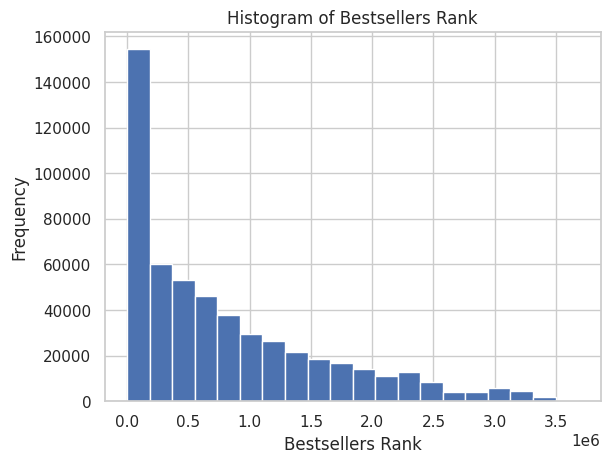

In [ ]:
# Creating a histogram for the 'bestsellers-rank' column in the DataFrame 'df_pred1_cleaned' with 20 bins.
plt.hist(df_pred1_cleaned['bestsellers-rank'], bins=20)

# Adding labels to the x and y axes.
plt.xlabel('Bestsellers Rank')
plt.ylabel('Frequency')

# Setting a title for the histogram.
plt.title('Histogram of Bestsellers Rank')

# Displaying the histogram.
plt.show()

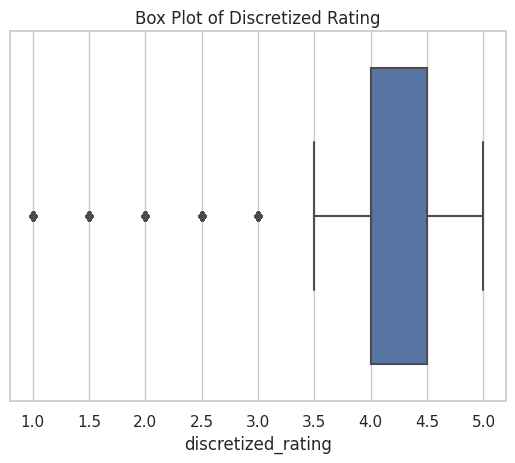

In [ ]:
# Creating a box plot to visualize the 'discretized_rating' column in the DataFrame 'df_pred1_cleaned' using Seaborn.
sns.boxplot(x='discretized_rating', data=df_pred1_cleaned)

# Adding a title to the box plot.
plt.title('Box Plot of Discretized Rating')

# Displaying the box plot.
plt.show()


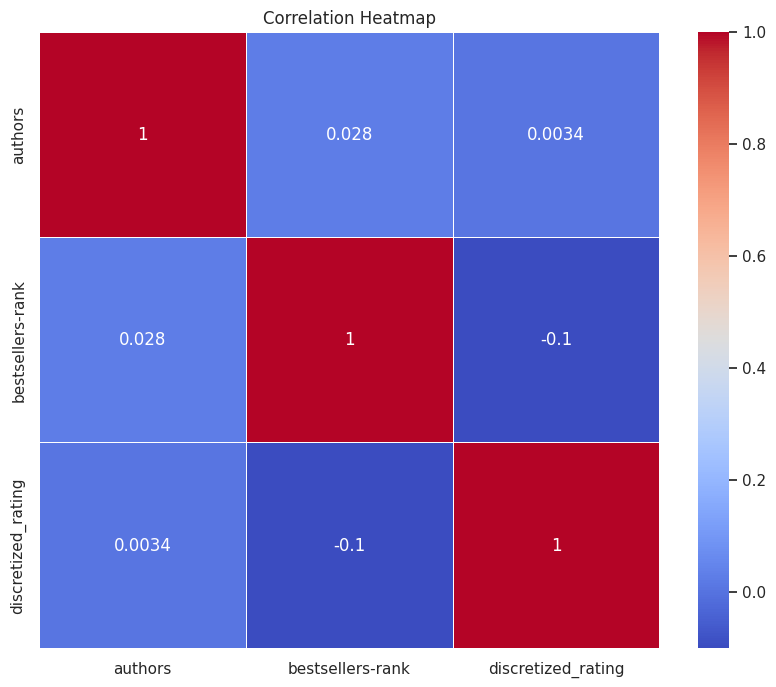

In [ ]:
# Calculating the correlation matrix for the columns in the DataFrame 'df_pred1_cleaned'.
correlation_matrix = df_pred1_cleaned.corr()

# Creating a heatmap to visualize the correlation matrix.
plt.figure(figsize=(10, 8))  # Setting the figure size.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding a title to the heatmap.
plt.title('Correlation Heatmap')

# Displaying the heatmap.
plt.show()


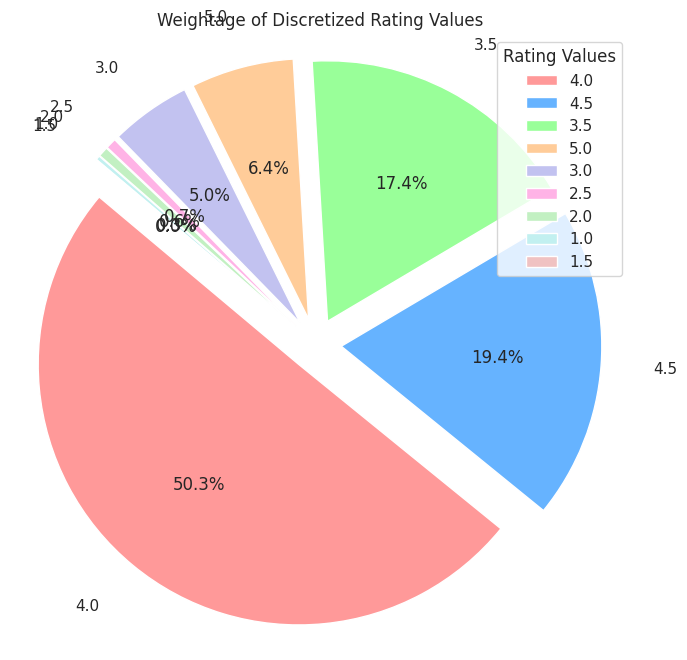

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rating_counts = df_pred1_cleaned['discretized_rating'].value_counts()

# Define custom colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#c2f0f0', '#f0c2c2', '#e6e6e6']

# Create a list of the same length as rating_counts for the explode values
explode = [0.1] * len(rating_counts)  # You can adjust the explosion as needed

# Plot the pie chart with customizations
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, labeldistance=1.2)
plt.title('Weightage of Discretized Rating Values')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is round

# Add a legend for better organization
plt.legend(labels=rating_counts.index, title='Rating Values', loc='upper right')

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'discretized_rating' is a column in your DataFrame
# You can adjust the column name as needed
X = df_pred1_cleaned.drop(columns=['discretized_rating'])
y = df_pred1_cleaned['discretized_rating']

# Stratified sampling to reduce the dataset to 100,000 instances while preserving rating proportions
X_train, _, y_train, _ = train_test_split(X, y, train_size=300000, stratify=y, random_state=42)

# Create a new DataFrame with the selected instances
df_pred1_reduced = pd.concat([X_train, y_train], axis=1)

# Now, df_reduced contains the reduced dataset with 200,000 instances


In [ ]:
df_pred1_reduced.shape

(300000, 3)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score

In [ ]:
df_pred1_reduced

,authors,bestsellers-rank,discretized_rating
270474,130070,1414216.0,4.5
474046,4104,234273.0,3.5
109003,288847,918880.0,4.5
417476,182665,2112.0,4.0
232416,24884,536983.0,4.0
...,...,...,...
257448,84750,700506.0,4.0
642175,165196,203525.0,4.5
648196,39549,3864.0,4.5
73267,258365,54306.0,4.0


In [ ]:
X = df_pred1_reduced.drop('discretized_rating', axis=1)
y = df_pred1_reduced['discretized_rating']


In [ ]:
y

270474    4.5
474046    3.5
109003    4.5
417476    4.0
232416    4.0
         ... 
257448    4.0
642175    4.5
648196    4.5
73267     4.0
636422    4.5
Name: discretized_rating, Length: 300000, dtype: float64

In [ ]:
y = y.astype(str)

In [ ]:
y

270474    4.5
474046    3.5
109003    4.5
417476    4.0
232416    4.0
         ... 
257448    4.0
642175    4.5
648196    4.5
73267     4.0
636422    4.5
Name: discretized_rating, Length: 300000, dtype: object

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(X_train, y_train, X_val, y_val, X_test, y_test)

        authors  bestsellers-rank
79618    171826          116910.0
949344   243822         2311889.0
912862   229362         1813927.0
918097   268432         2217285.0
228576   283992          861660.0
...         ...               ...
642987   157188            7688.0
88745    276821           47468.0
961660   245621         1038286.0
455906   280215           87884.0
15671     37413          751687.0

[210000 rows x 2 columns] 79618     3.5
949344    4.0
912862    4.0
918097    3.5
228576    4.0
         ... 
642987    4.0
88745     4.5
961660    3.5
455906    4.5
15671     3.5
Name: discretized_rating, Length: 210000, dtype: object         authors  bestsellers-rank
716313    91844          340248.0
498080   127333         1066763.0
396822    74107          455499.0
406048    91084          413858.0
572399   148150          508200.0
...         ...               ...
352041    75780          461443.0
741017   170894         2840055.0
345551    65720           19896.0
872463   149025

In [ ]:
y_train

79618     3.5
949344    4.0
912862    4.0
918097    3.5
228576    4.0
         ... 
642987    4.0
88745     4.5
961660    3.5
455906    4.5
15671     3.5
Name: discretized_rating, Length: 210000, dtype: object

As discussed in the lectures, we fit_transform on the training set using SdandardScaler and just transform on the testing data as we want that to be in the range of training.

In [ ]:
scaler = StandardScaler()
# Fit the scaler to the training data and transform all datasets
X_train = scaler.fit_transform(X_train)
# X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

In [ ]:
df_pred1_reduced.shape

(300000, 3)

In [ ]:
y_train = y_train.astype(str)
y_test = y_test.astype(str)

Now we create the model dictionary

In [ ]:
model_dict = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'Ridge Classifier': RidgeClassifier(),
    'One-vs-Rest (OvR) Random Forest': OneVsRestClassifier(RandomForestClassifier()),
    'One-vs-One (OvO) Random Forest': OneVsOneClassifier(RandomForestClassifier()),
    'Random Forest': RandomForestClassifier()
    }

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

best_model = None
best_accuracy = 0.0

# Train and evaluate each classification model
for model_name, classification_model in model_dict.items():
    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test) #predicting using current model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    print(f'{model_name} Accuracy: {accuracy}')


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

if best_model is not None:
    print(f'The best model is {best_model} with an accuracy of {best_accuracy}')


Logistic Regression Accuracy: 0.8314828197884502
Ridge Classifier Accuracy: 0.8303659417909467
One-vs-Rest (OvR) Random Forest Accuracy: 0.9250377767557979
One-vs-One (OvO) Random Forest Accuracy: 0.9249720780500624
Random Forest Accuracy: 0.9253662702844754
The best model is Random Forest with an accuracy of 0.9253662702844754


# Now predicting weight of the book from its dimensions X,Y,Z

In [ ]:
df['weight'].unique

<bound method Series.unique of 0          224.00
1          285.76
2          386.00
3          436.00
4          980.00
            ...  
1109367    362.87
1109368    463.00
1109369    725.75
1109372       NaN
1109376    227.00
Name: weight, Length: 669253, dtype: float64>

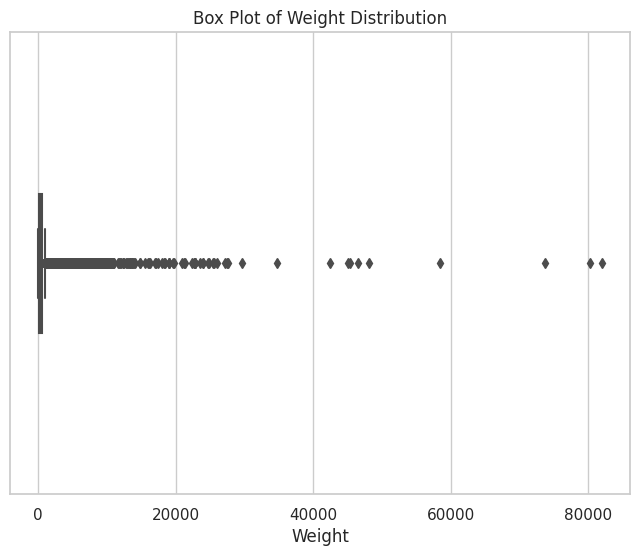

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importing seaborn for better styling (optional)

# Assuming you have a DataFrame 'df' with a 'weight' column
sns.set(style="whitegrid")  # Optional: Set a style for the plot

# Create a box plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.boxplot(x=df["weight"], width=0.3)  # Create the box plot for the "weight" column

plt.title("Box Plot of Weight Distribution")  # Set the plot title
plt.xlabel("Weight")  # Label the x-axis
plt.show()

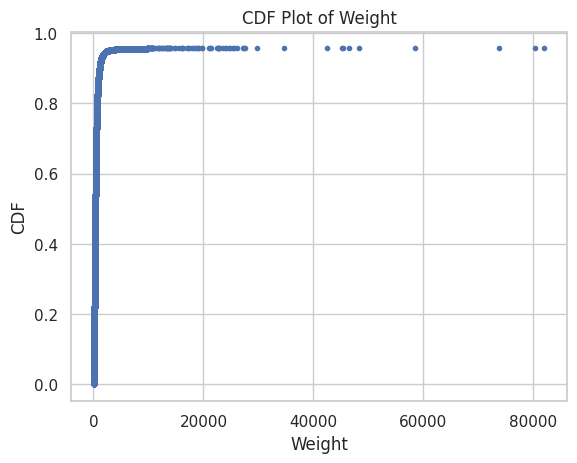

In [ ]:
# Cumulative Distribution Function (CDF) Plot
# Create a CDF plot to visualize the cumulative distribution of 'weight' values
sorted_weights = df['weight'].sort_values()
cdf = (1.0 + np.arange(len(sorted_weights))) / len(sorted_weights)
plt.plot(sorted_weights, cdf, marker='.', linestyle='none')
plt.title('CDF Plot of Weight')
plt.xlabel('Weight')
plt.ylabel('CDF')
plt.show()

In [ ]:
# Assuming you have a DataFrame 'df' with a 'weight' column
mean_weight = df['weight'].mean()
mode_weight = df['weight'].mode().values[0]

print(f"Mean weight: {mean_weight}")
print(f"Mode weight: {mode_weight}")

Mean weight: 452.9211929969334
Mode weight: 68.0


# We can choose three boundaries <br>
# 1) Mean boundary
# 2) Mode Boundary
# 3) Percentile
# <br>
# For now, we might consider the top 25% of weights as "heavy" and the rest as "not heavy.

In [ ]:
boundary = df['weight'].quantile(0.80)

In [ ]:
# Set the desired size of the random sample
sample_size_2 = 50000 # Adjust this to your desired sample size

# Randomly sample 'sample_size' rows from the DataFrame
sp3 = df.sample(n=sample_size_2, random_state=42)  # 'random_state' for reproducibility

# You can save the sampled data to a new CSV file if needed
sp3.to_csv('sp3.csv', index=False)

In [ ]:
# Handling null values in 'rating-avg' and 'rating-count' with different values
sp3['dimension-x'].fillna(0, inplace=True)  # Replace 0 with the value you want to fill nulls with
sp3['dimension-y'].fillna(0, inplace=True)  # Replace 0 with the value you want to fill nulls with
sp3['dimension-z'].fillna(0,inplace=True)

In [ ]:
model_dict = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'Ridge Classifier': RidgeClassifier(),
    'One-vs-Rest (OvR) Random Forest': OneVsRestClassifier(RandomForestClassifier()),
    'One-vs-One (OvO) Random Forest': OneVsOneClassifier(RandomForestClassifier()),
    'Random Forest': RandomForestClassifier()
    }

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

best_model = None
best_accuracy = 0.0

# Load your preprocessed data and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate each classification model
for model_name, classification_model in model_dict.items():
    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    print(f'{model_name} Accuracy: {accuracy}')


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

if best_model is not None:
    print(f'The best model is {best_model} with an accuracy of {best_accuracy}')

Logistic Regression Accuracy: 0.8206
Ridge Classifier Accuracy: 0.7895
One-vs-Rest (OvR) Random Forest Accuracy: 0.9095
One-vs-One (OvO) Random Forest Accuracy: 0.9088
Random Forest Accuracy: 0.909
The best model is One-vs-Rest (OvR) Random Forest with an accuracy of 0.9095


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Your code for training models and making predictions goes here...

results = {}
for model_name, model in model_dict.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model using different metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Import the recall_score function
    f1 = f1_score(y_test, y_pred)

    # Store the evaluation results in the dictionary
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print the evaluation results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


Model: Logistic Regression
Accuracy: 0.8206
Precision: 0.6716417910447762
Recall: 0.46035805626598464
F1 Score: 0.5462822458270107

Model: Ridge Classifier
Accuracy: 0.7895
Precision: 0.7732426303854876
Recall: 0.1453537936913896
F1 Score: 0.24470757086472908

Model: One-vs-Rest (OvR) Random Forest
Accuracy: 0.9094
Precision: 0.813588850174216
Recall: 0.7962489343563512
F1 Score: 0.8048255062473071

Model: One-vs-One (OvO) Random Forest
Accuracy: 0.9103
Precision: 0.8181818181818182
Recall: 0.7941176470588235
F1 Score: 0.8059701492537314

Model: Random Forest
Accuracy: 0.9098
Precision: 0.8147340889276373
Recall: 0.7966751918158568
F1 Score: 0.8056034482758622



# what can tell from these results??

The model has relatively good accuracy, suggesting that it performs well in terms of overall classification.

However, the low recall indicates that the model is not effective at identifying all heavy books. This means that there is a significant number of false negatives (i.e., actual heavy books that the model incorrectly classifies as not heavy).

The relatively high precision suggests that when the model predicts a book is heavy, it's often correct. This is good for avoiding unnecessary costs associated with shipping heavy books.

The F1 score balances precision and recall, in this case it suggests that there's room for improvement in capturing more true positives without sacrificing too much precision.

# What is the scope of improvement ??
The *low recall* indicates that the model is not effective at identifying all heavy books. This means that there is a significant number of false negatives (i.e., actual heavy books that the model incorrectly classifies as not heavy).

# How do we improve the recall??
By default, logistic regression classifies instances with a probability greater than 0.5 as the positive class. You can lower the threshold to be more lenient in classifying an instance as "heavy." This will increase recall but may decrease precision.<br>
In this case we decreased it to 0.4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load and preprocess SP3 data to create a DataFrame 'sp3' with columns: x, y, z, weight

# Set the boundary
boundary = sp3['weight'].quantile(0.75)

# Create a binary label based on the boundary
sp3['is_heavy'] = sp3['weight'] > boundary

# Select the features (x, y, z dimensions) and the label
X = sp3[['dimension-x', 'dimension-y', 'dimension-z']]
y = sp3['is_heavy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a logistic regression model
logistic_classifier = LogisticRegression()

# Train the logistic regression model on the training data
logistic_classifier.fit(X_train, y_train)

# Make probability predictions on the test data
y_prob = logistic_classifier.predict_proba(X_test)

# Choose a lower threshold for predicting "heavy"
threshold = 0.4  # Adjust this threshold as needed

# Create predictions based on the chosen threshold
y_pred = [1 if prob >= threshold else 0 for prob in y_prob[:, 1]]

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 83.43%
Precision: 65.78%
Recall: 61.21%
F1 Score: 63.41%
Confusion Matrix:
[[6907  747]
 [ 910 1436]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Load and preprocess SP3 data to create a DataFrame 'sp3' with columns: x, y, z, weight

# Set the boundary
boundary = sp3['weight'].quantile(0.75)

# Create a binary label based on the boundary
sp3['is_heavy'] = sp3['weight'] > boundary

# Select the features (x, y, z dimensions) and the label
X = sp3[['dimension-x', 'dimension-y', 'dimension-z']]
y = sp3['is_heavy']

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize a logistic regression model with regularization
logistic_classifier = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')

# Train the logistic regression model on the training data
logistic_classifier.fit(X_train, y_train)

# Make probability predictions on the test data
y_prob = logistic_classifier.predict_proba(X_test)

# Choose a lower threshold for predicting "heavy"
threshold = 0.3  # Adjust this threshold as needed

# Create predictions based on the chosen threshold
y_pred = [1 if prob >= threshold else 0 for prob in y_prob[:, 1]]

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Perform cross-validation to assess generalization
cv_scores = cross_val_score(logistic_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Accuracy: 78.25%
Precision: 70.79%
Recall: 95.94%
F1 Score: 81.47%
Confusion Matrix:
[[4632 3003]
 [ 308 7278]]
Cross-Validation Accuracy: 83.73%


# In this improved code:
We address class imbalance using the Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic examples of the minority class, which helps balance the class distribution.

We use cross-validation (cross_val_score) to assess the model's generalization performance.

We adjust the regularization (penalty) of the logistic regression model.